# Petite étude des températures de surface

## Angélina Gentaz

## I) Introduction

### a) Contexte

Le dernier rapport du Groupe d’experts Intergouvernemental sur l’Evolution du Climat (GIEC/IPCC) énonce des conclusions alarmantes sur le réchauffement climatique. Les dernières dècennies sont apparues être les plus chaudes depuis les années 1850 avec une hausse moyenne de la température atmosphérique de 0.87 ± 0.12°C sur la période 2006-2015 (IPCC, 2021).
Cette petite étude portera sur l’analyse des données de températures de surface de l’air afin de mettre en évidence cette tendance à la hausse observée depuis plusieurs décennies.

### b) Objectifs

Le premier objectif est de faire apparaitre un effet faible et lent d’augmentation des températures de surface (de l’ordre de 1°C sur les trentes dernières années) grâce aux données fournies. Le deuxième objectif est de montrer que cet effet est significatif, c'est à dire que cette augmentation des températures ne correspond pas à une fluctuation statistique.

### c) Méthodologie

Nous étudierons les données des relevés de température moyennes enregistrées quotidiennement dans une station météorologique d’Europe tirées de la base de données de l’European Climate Assesment Dataset (ECAD). Après s'être familiarisé avec notre jeu de données, on établira un modèle sinusoidale des variations saisonnières de températures. On s'intéressera ensuite à la tendance globale grâce à la moyenne mobile.

## II) Mise en évidence du réchauffement climatique grâce aux températures de surface

In [1]:
# Importation des modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Récupération des données et création de 2 NumpayArray 1D contenant les données de chaque colonne 
date, temperature = np.loadtxt('montelimar_temperature.dat', unpack=True) 
print(len(date))
print(date)

36295
[22553. 22554. 22555. ... 58846. 58847. 58848.]


Pour que les données de date nous parle mieux, on convertit les jours juliens en jours grégoriens. Un convertisseur sur internet nous insique que la première date de notre jeu de donnée (22553 en julien) correspond au 17 aout 1920. De plus on sait qu'il y a 36 295 données, donc 36 295 jours à considérer.

In [2]:
# On convertit en calendrier grégorien
dates = np.arange('1920-08-17', '2019-12-31', dtype = 'datetime64[D]')
print(len(dates))

36295


En affichant la longueur de ce tableau Numpy, on a bien les 36 295 jours attendus. Notre jeu de données s'étend donc du 17/08/1920 jusqu'au 31/12/2019 soit un petit peu moins de 100 ans. C'est une bonne plage de données car on va pouvoir comparer plusieurs décennies entre elles. On trace rapidement les températures en fonction de la date pour se familieriser avec ce jeu de données et voir l'allure générale.

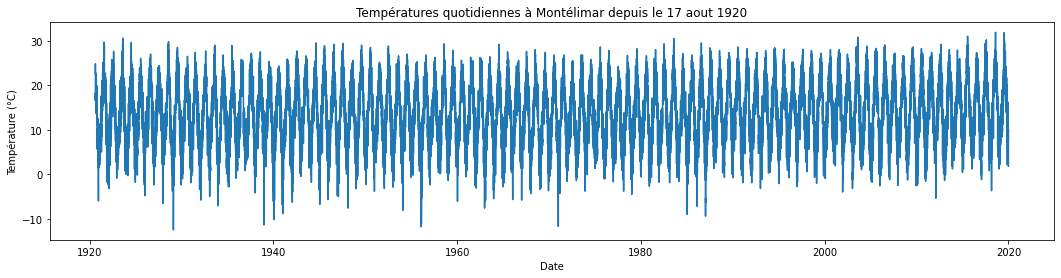

In [3]:
# Affichage graphique
plt.figure(figsize=(18,4))
plt.plot(dates, temperature)
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Températures quotidiennes à Montélimar depuis le 17 aout 1920')
plt.show()

On remarque que nos données sont difficilement lisibles mais on peut tout de même repérer une périodicité : les températures semblent suivre une relation périodique, oscillant entre 0 et 20°C. Il s’agit en fait tout simplement des variations de températures saisonnières. Pour mieux de rendre compte de ce phénomène, on trace ce même graphique mais sur une échelle plus courte, par exemple une décennie :

In [4]:
# Je suis plus à l'aise à manier des DataFrame. On créer alors un dictionnaire puis le dataframe correspondant.
dico={"dates" : dates, "temperature" : temperature} #dictionnaire
df= pd.DataFrame(data = dico) #dataframe

# Visualisation bèrve du dataframe
df.head()

,dates,temperature
0,1920-08-17,22.6
1,1920-08-18,22.6
2,1920-08-19,24.8
3,1920-08-20,17.5
4,1920-08-21,16.5


In [5]:
# On se focalise sur une seule décennie, la décénnie 2010 par exemple.
d2010 = df[df['dates'] > np.datetime64('2010-01')] 

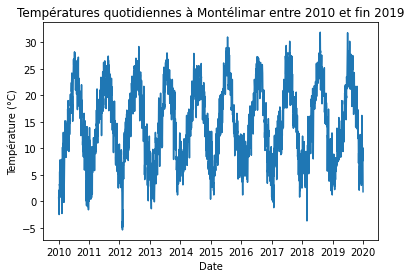

In [6]:
# Visualisation graphique
plt.plot(d2010['dates'], d2010['temperature'])
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Températures quotidiennes à Montélimar entre 2010 et fin 2019')
plt.show()

In [7]:
T2010=d2010['temperature']
dt2010=d2010['dates']
print("Il y a", len(dt2010), "valeurs de température pour la décennies 2010.")
dtf2010 = np.arange(0,3650) #On a besoin des floattants par la suite (plutot que du format datatime64)
print("La température moyenne au cours de la décénnie 2010 à Montélimar est de", T2010.mean(), "C°.")

Il y a 3650 valeurs de température pour la décennies 2010.
La température moyenne au cours de la décénnie 2010 à Montélimar est de 14.599561643835615 C°.


On remarque bien ici que les valeurs mensuelles semblent suivre logiquement une variation saisonnière qu’on peut modéliser par une sinusoïde. On propose l’ajustement avec l’équation suivante :
$$T=A \sin(\omega t+\phi) + B$$
Avec $T$ la température,  $t$ la date, $\omega=\frac{2\pi}{T_{0}}$ la pulsation (exprimée en rad/s), qui est proportionnelle à la fréquence avec $T_{0}$ la période, i.e  l’intervalle de temps au bout duquel la fonction se reproduit identiquement à elle-même. Enfin, $\phi$ représente la phase à l’origine et s’exprime en radians et enfin $B$ qui représente la température moyenne.
On trouve, après avoir fait notre ajustement avec ce modèle :

-----Tableau des paramètres et de leur incertitude-----
a = 9.20505483303718 +- 0.07193041951137133
T0 = 365.32405545890424 +- 0.15785637239084588
phi = -1.8666610609864775 +- 0.015761719647264968
b = 14.591837248989608 +- 0.05097170199286122
-------------------------------------------------------


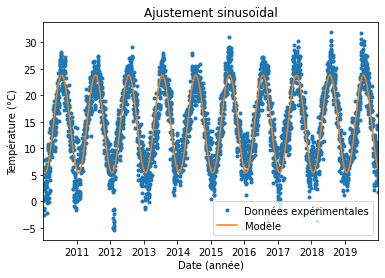

In [8]:
# Modèle : ajustement sinusoïdal
def sinLaw(x, a, T0, phi, b):
    w = 2 * np.pi / T0                   #calcul de la pulsation
    return a * np.sin(w * x + phi) + b

# Ajustement du modèle aux données
params, covar = curve_fit(sinLaw, dtf2010, T2010, [10, 365, 0, T2010.mean()])
"""On prend comme valeurs de "test" pour aider le modèle : a=10, T0=365 (période d'1 an), phi=0. Pour b on s'attend à retrouver
plus ou moins ce qu'on avait caculé plus haut, i.e la moyenne sur la décennie considérée"""
                                                                            
# Récupération des incertitudes à partir de la matrice de covariance
perr = np.sqrt(np.diag(covar))

# Récupération des valeurs des paramètres et des incertitudes trouvées grâce à l'ajustement
a = params[0]
T0 = params[1]
phi = params[2]
b = params[3]

da = perr[0]
dT0 = perr[1]
dphi = perr[2]
db = perr[3]

liste_b=[b] # on crée une liste contenant la température moyenne pour la décennie qu'on va remplir au fur et à mesure
liste_db=[db] # de même pour l'incertitude sur le température moyenne


# Affichage des résultats et des incertitudes
print("-----Tableau des paramètres et de leur incertitude-----")
print('a =', a, '+-', da)
print('T0 =', T0, '+-', dT0)
print('phi =', phi, '+-', dphi)
print('b =', b, '+-', db)
print("-------------------------------------------------------")

# Calcul du modèle
y_model = params[0] * np.sin(2 * np.pi / params[1] * dtf2010 + params[2]) + params[3]

# Affichage du résultat
plt.plot(dt2010, T2010, '.', label = "Données expérimentales")
plt.plot(dt2010, y_model, label = 'Modèle')
plt.title("Ajustement sinusoïdal")
plt.xlabel('Date (année)')
plt.ylabel('Température (°C)')
plt.xlim(min(dt2010), max(dt2010))
plt.legend()
plt.show()

Il est difficile de voir à l’œil nu une quelconque tendance à la hausse comme on pourrait s’y attendre. En effet nous traitons ici des données quotidiennes et les fluctuations sont donc importantes d’un jour à l’autre.

De plus, si on ajuste notre modèle sur l’ensemble des données (plutôt que sur une unique plage de données comme c'était le cas cici avec la décennie 2010), cela ne donnera aucune augmentation moyenne de la température. Pour pouvoir mettre en évidence une tendance, il nous faut « dézoomer » et traiter et analyser nos données d’un point de vue statistique. On va donc maintenant calculer et manipuler des moyennes. Tout d’abord, on s’intéresse encore aux variations saisonnières et on va cette fois ci calculer les moyennes de températures de surface à Montélimar pour chaque mois et pour chaque année. On obtient le graphique suivant :

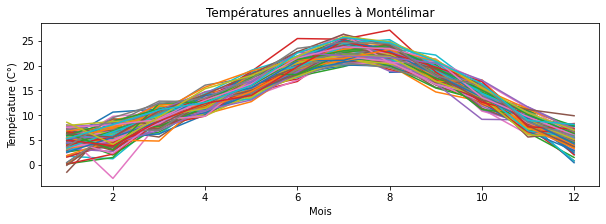

In [9]:
# On fait un tableau croisé dynamique (pivot table) pour regrouper et faire les moyennes mensuelles
df['month'] = df['dates'].dt.month
df['year'] = df['dates'].dt.year
pivot = pd.pivot_table(df, values='temperature', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(10,3))
plt.title('Températures annuelles à Montélimar')
plt.xlabel('Mois')
plt.ylabel('Température (C°)')
plt.legend().remove()
plt.show()

Pour tracer ce graphique, on a dans un premier temps calculer la moyenne de température de chaque mois, et ce pour chaque année de 1900 à fin 2020 (on « lisse » donc les données car on considère les températures moyennes mensuelles et non les températures quotidiennes).
Clairement, on retrouve, mais cette fois-ci sous une autre forme, ce que l’on avait déjà remarqué plus haut : les températures les plus fortes sont autour des mois de juin et juillet et les températures les plus basses en hiver. De plus on peut aussi déduire de ce graphique le caractère périodique de notre jeu de données : chaque courbe de couleur représente en fait les variations des températures moyennes mensuelles pour 1 année et on voit bien que les températures de surfaces à Montélimar sont sensiblement les mêmes d’année en année (si non on observerait chaque courbe aurait une trajectoire bien différente, mais ici on voit bien que chaque courbe suit une parabole tournée vers le bas). Pour que les choses soient plus claires, on peut fusionner ces lignes en une seule, en faisant la moyenne des niveaux mensuels :

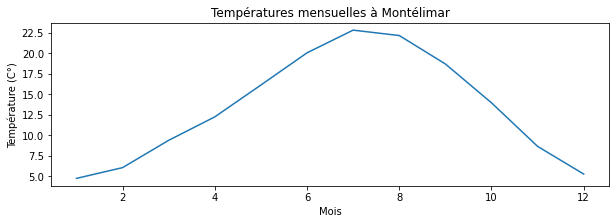

In [10]:
# Visualisation graphique
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(10,3))
plt.title('Températures mensuelles à Montélimar')
plt.xlabel('Mois')
plt.ylabel('Température (C°)')
plt.show()

Cependant, là encore, cela ne nous permet pas de voir une tendance des hausses de températures au fur et à mesure des années. Ces premiers graphiques nous ont permis de bien s’approprier notre jeu de données. Nous allons maintenant nous intéresser aux variations des températures moyennes, non pas quotidiennes ou mensuelles comme ça a été le cas jusqu’à présent, mais nous allons étudier ces variations annuellement. On trace le graphique suivant : 

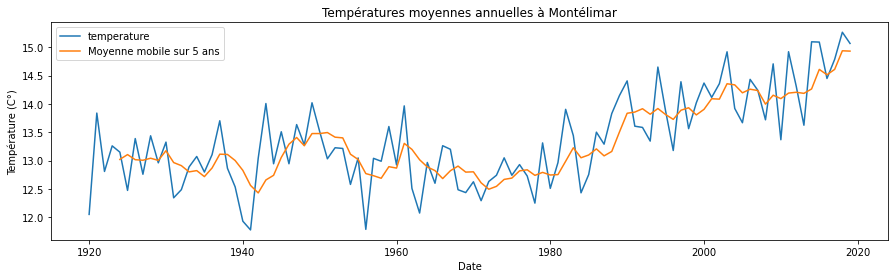

In [11]:
#Moyenne annuelles des températures et moyenne mobile (rolling mean)
moy_an = pd.pivot_table(df, values='temperature', index='year', aggfunc='mean') #moyenne anuelle des températures
moy_an['Moyenne mobile sur 5 ans'] = moy_an['temperature'].rolling(5).mean() #moyenne mobile
moy_an[['temperature','Moyenne mobile sur 5 ans']].plot(figsize=(15,4))
plt.title('Températures moyennes annuelles à Montélimar')
plt.xlabel('Date')
plt.ylabel('Température (C°)')
plt.show()

On a utilisé ici un outil statistique intéressant : la moyenne mobile. Une moyenne mobile est un type de moyenne statistique utilisée pour analyser des séries ordonnées de données, le plus souvent des séries temporelles comme c’est le cas ici, en supprimant les fluctuations transitoires de façon à en souligner les tendances à plus long terme. Elle permet en quelques sortes de « lisser » nos valeurs en fonction du temps. C’est exactement ce qui nous intéresse ici si on veut dégager une tendance de nos données de températures. La moyenne mobile se calcule suivant la formule :
$$\bar{x}_{n}=\frac{1}{\mathrm{~N}} \sum_{k=0}^{N-1} x_{n-k}$$
où $N$ représente le nombre de valeurs successives à prendre en compte (5 dans le cadre de notre graphique ci dessus car on considère dans un premier temps une période de 5 ans) et $x_{n}$ représente la valeur de référence.

La courbe orange sur le graphique représente cette moyenne mobile. On a dans un premier temps calculé la moyenne mobile en prenant comme durée de référence une durée de 5 ans. Par exemple : le point correspondant à l’année 1975 situé sur la courbe orange est la moyenne des températures moyennes annuelles entre 1970 et 1975, le point correspondant à l’année 1976 situé sur la courbe orange est la moyenne des températures moyennes annuelles entre 1971 et 1976 etc. Cependant la moyenne mobile sur 5 ans ne « lisse » pas tant que ça nos données et il est encore difficile de se rendre compte visuellement d’une tendance. On essaie ainsi avec une moyenne mobile sur 10 puis sur 30 ans, ce qui nous donne : 

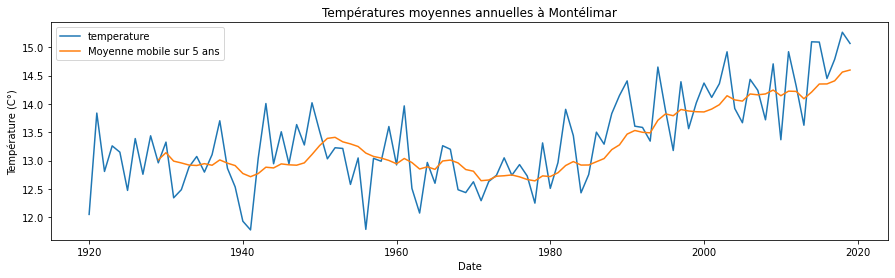

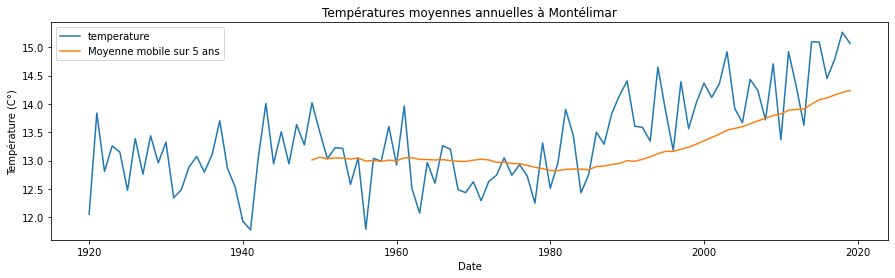

In [12]:
#Moyenne mobile
moy_an = pd.pivot_table(df, values='temperature', index='year', aggfunc='mean') #moyenne anuelle des températures
moy_an['Moyenne mobile sur 5 ans'] = moy_an['temperature'].rolling(10).mean() #moyenne mobile
moy_an[['temperature','Moyenne mobile sur 5 ans']].plot(figsize=(15,4))
plt.title('Températures moyennes annuelles à Montélimar')
plt.xlabel('Date')
plt.ylabel('Température (C°)')
plt.show()

moy_an = pd.pivot_table(df, values='temperature', index='year', aggfunc='mean') #moyenne anuelle des températures
moy_an['Moyenne mobile sur 5 ans'] = moy_an['temperature'].rolling(30).mean() #moyenne mobile
moy_an[['temperature','Moyenne mobile sur 5 ans']].plot(figsize=(15,4))
plt.title('Températures moyennes annuelles à Montélimar')
plt.xlabel('Date')
plt.ylabel('Température (C°)')
plt.show()

On peut voir la différence selon que la durée de la moyenne mobile considérée. Il est maintenant visuellement clair qu’il y a bien une tendance à la hausse et que la température de surface moyenne est passée d’environ 13.1 C° à 14.25 C°, soit 8,8 % en plus de 100 ans.

L'outil de la moyenne mobile est donc intéressant pour pouvoir dégager une tendance. Cependant si on veut montrer que cette tendance est effectivement significative d'un point de vue statistique, il vaut reprendre notre ajustement sinusoïdal.
On pourra par exemple essayer d'appliquer cet ajustement sinusoïdal pour chaque décennie, et voir si le paramètre $B$ (température moyenne) augmente au fil des décennies en prenant également en compte les incertitudes de notre modèle.

### Décennie 2000

In [13]:
# Sélection de la plage de données considérée
d2010 = df[df['dates'] > np.datetime64('2000-01')] 
d2010 = d2010[d2010['dates'] < np.datetime64('2010-01')] 

T2010=d2010['temperature']
dt2010=d2010['dates']
print("Il y a", len(dt2010), "valeurs de température pour la décennies 2000.")
dtf2010 = np.arange(0,3652) #On a besoin des floattants par la suite (plutot que du format datatime64)
print("La température moyenne au cours de la décénnie 2000 à Montélimar est de", T2010.mean(), "C°.")

# Ajustement du modèle aux données
params, covar = curve_fit(sinLaw, dtf2010, T2010, [10, 365, 0, T2010.mean()])
"""On prend comme valeurs de "test" pour aider le modèle : a=10, T0=365 (période d'1 an), phi=0. Pour b on s'attend à retrouver
plus ou moins ce qu'on avait caculé plus haut, i.e la moyenne sur la décennie considérée"""
                                                                            
# Récupération des incertitudes à partir de la matrice de covariance
perr = np.sqrt(np.diag(covar))

# Récupération des valeurs des paramètres et des incertitudes trouvées grâce à l'ajustement
a = params[0]
T0 = params[1]
phi = params[2]
b = params[3]

da = perr[0]
dT0 = perr[1]
dphi = perr[2]
db = perr[3]

# Affichage des résultats et des incertitudes
print("-----Tableau des paramètres et de leur incertitude-----")
print('a =', a, '+-', da)
print('T0 =', T0, '+-', dT0)
print('phi =', phi, '+-', dphi)
print('b =', b, '+-', db)
print("-------------------------------------------------------")

Il y a 3652 valeurs de température pour la décennies 2000.
La température moyenne au cours de la décénnie 2000 à Montélimar est de 14.245235487404162 C°.
-----Tableau des paramètres et de leur incertitude-----
a = 9.21820854822155 +- 0.0711870231130229
T0 = 365.1149754661624 +- 0.15603049486461237
phi = -1.8556033739578754 +- 0.015587595713526315
b = 14.247294409708742 +- 0.050469756411149105
-------------------------------------------------------


In [14]:
# On complète donc les listes qu'on avait crées plus haut pour pouvoir faire une étude statistique ensuite.
liste_b.append(b)
liste_db.append(db)

### Décennie 1990

et on répète l'opération pour chaque décennie jusqu'à 1920...

In [15]:
# Sélection de la plage de données considérée
d2010 = df[df['dates'] > np.datetime64('1990-01')] 
d2010 = d2010[d2010['dates'] < np.datetime64('2000-01')] 

T2010=d2010['temperature']
dt2010=d2010['dates']
print("Il y a", len(dt2010), "valeurs de température pour la décennies 2010.")
dtf2010 = np.arange(0,3651) #On a besoin des floattants par la suite (plutot que du format datatime64)
print("La température moyenne au cours de la décénnie 2010 à Montélimar est de", T2010.mean(), "C°.")

# Ajustement du modèle aux données
params, covar = curve_fit(sinLaw, dtf2010, T2010, [10, 365, 0, T2010.mean()])
"""On prend comme valeurs de "test" pour aider le modèle : a=10, T0=365 (période d'1 an), phi=0. Pour b on s'attend à retrouver
plus ou moins ce qu'on avait caculé plus haut, i.e la moyenne sur la décennie considérée"""
                                                                            
# Récupération des incertitudes à partir de la matrice de covariance
perr = np.sqrt(np.diag(covar))

# Récupération des valeurs des paramètres et des incertitudes trouvées grâce à l'ajustement
a = params[0]
T0 = params[1]
phi = params[2]
b = params[3]

da = perr[0]
dT0 = perr[1]
dphi = perr[2]
db = perr[3]

# Affichage des résultats et des incertitudes
print("-----Tableau des paramètres et de leur incertitude-----")
print('a =', a, '+-', da)
print('T0 =', T0, '+-', dT0)
print('phi =', phi, '+-', dphi)
print('b =', b, '+-', db)
print("-------------------------------------------------------")

Il y a 3651 valeurs de température pour la décennies 2010.
La température moyenne au cours de la décénnie 2010 à Montélimar est de 13.863872911531088 C°.
-----Tableau des paramètres et de leur incertitude-----
a = 8.924915713043827 +- 0.07294474212377947
T0 = 365.06898976280894 +- 0.1650980297194967
phi = -1.8571393555680493 +- 0.016495715906128017
b = 13.864598819281133 +- 0.051712398322129836
-------------------------------------------------------


In [16]:
liste_b.append(b)
liste_db.append(db)

### Décennie 1980

In [17]:
# Sélection de la plage de données considérée
d2010 = df[df['dates'] > np.datetime64('1980-01')] 
d2010 = d2010[d2010['dates'] < np.datetime64('1990-01')] 

T2010=d2010['temperature']
dt2010=d2010['dates']
print("Il y a", len(dt2010), "valeurs de température pour la décennies 2010.")
dtf2010 = np.arange(0,3652) #On a besoin des floattants par la suite (plutot que du format datatime64)
print("La température moyenne au cours de la décénnie 2010 à Montélimar est de", T2010.mean(), "C°.")

# Ajustement du modèle aux données
params, covar = curve_fit(sinLaw, dtf2010, T2010, [10, 365, 0, T2010.mean()])
"""On prend comme valeurs de "test" pour aider le modèle : a=10, T0=365 (période d'1 an), phi=0. Pour b on s'attend à retrouver
plus ou moins ce qu'on avait caculé plus haut, i.e la moyenne sur la décennie considérée"""
                                                                            
# Récupération des incertitudes à partir de la matrice de covariance
perr = np.sqrt(np.diag(covar))

# Récupération des valeurs des paramètres et des incertitudes trouvées grâce à l'ajustement
a = params[0]
T0 = params[1]
phi = params[2]
b = params[3]

da = perr[0]
dT0 = perr[1]
dphi = perr[2]
db = perr[3]

# Affichage des résultats et des incertitudes
print("-----Tableau des paramètres et de leur incertitude-----")
print('a =', a, '+-', da)
print('T0 =', T0, '+-', dT0)
print('phi =', phi, '+-', dphi)
print('b =', b, '+-', db)
print("-------------------------------------------------------")

Il y a 3652 valeurs de température pour la décennies 2010.
La température moyenne au cours de la décénnie 2010 à Montélimar est de 13.279983570646221 C°.
-----Tableau des paramètres et de leur incertitude-----
a = 9.181521977022829 +- 0.07352240211438865
T0 = 365.4145797919657 +- 0.1618279889155171
phi = -1.9087790111414988 +- 0.0161680769705665
b = 13.274944468102749 +- 0.05210452077894161
-------------------------------------------------------


In [18]:
liste_b.append(b)
liste_db.append(db)

### Décennie 1970

In [19]:
# Sélection de la plage de données considérée
d2010 = df[df['dates'] > np.datetime64('1970-01')] 
d2010 = d2010[d2010['dates'] < np.datetime64('1980-01')] 

T2010=d2010['temperature']
dt2010=d2010['dates']
print("Il y a", len(dt2010), "valeurs de température pour la décennies 2010.")
dtf2010 = np.arange(0,3651) #On a besoin des floattants par la suite (plutot que du format datatime64)
print("La température moyenne au cours de la décénnie 2010 à Montélimar est de", T2010.mean(), "C°.")

# Ajustement du modèle aux données
params, covar = curve_fit(sinLaw, dtf2010, T2010, [10, 365, 0, T2010.mean()])
"""On prend comme valeurs de "test" pour aider le modèle : a=10, T0=365 (période d'1 an), phi=0. Pour b on s'attend à retrouver
plus ou moins ce qu'on avait caculé plus haut, i.e la moyenne sur la décennie considérée"""
                                                                            
# Récupération des incertitudes à partir de la matrice de covariance
perr = np.sqrt(np.diag(covar))

# Récupération des valeurs des paramètres et des incertitudes trouvées grâce à l'ajustement
a = params[0]
T0 = params[1]
phi = params[2]
b = params[3]

da = perr[0]
dT0 = perr[1]
dphi = perr[2]
db = perr[3]

# Affichage des résultats et des incertitudes
print("-----Tableau des paramètres et de leur incertitude-----")
print('a =', a, '+-', da)
print('T0 =', T0, '+-', dT0)
print('phi =', phi, '+-', dphi)
print('b =', b, '+-', db)
print("-------------------------------------------------------")

Il y a 3651 valeurs de température pour la décennies 2010.
La température moyenne au cours de la décénnie 2010 à Montélimar est de 12.734291974801422 C°.
-----Tableau des paramètres et de leur incertitude-----
a = 8.610394814148066 +- 0.07220312776728499
T0 = 365.11402070798937 +- 0.16938824273431968
phi = -1.8777572341836801 +- 0.016929096318565096
b = 12.733977762188676 +- 0.05118281173843313
-------------------------------------------------------


In [20]:
liste_b.append(b)
liste_db.append(db)

### Décennie 1960

In [21]:
# Sélection de la plage de données considérée
d2010 = df[df['dates'] > np.datetime64('1960-01')] 
d2010 = d2010[d2010['dates'] < np.datetime64('1970-01')] 

T2010=d2010['temperature']
dt2010=d2010['dates']
print("Il y a", len(dt2010), "valeurs de température pour la décennies 2010.")
dtf2010 = np.arange(0,3652) #On a besoin des floattants par la suite (plutot que du format datatime64)
print("La température moyenne au cours de la décénnie 2010 à Montélimar est de", T2010.mean(), "C°.")

# Ajustement du modèle aux données
params, covar = curve_fit(sinLaw, dtf2010, T2010, [10, 365, 0, T2010.mean()])
"""On prend comme valeurs de "test" pour aider le modèle : a=10, T0=365 (période d'1 an), phi=0. Pour b on s'attend à retrouver
plus ou moins ce qu'on avait caculé plus haut, i.e la moyenne sur la décennie considérée"""
                                                                            
# Récupération des incertitudes à partir de la matrice de covariance
perr = np.sqrt(np.diag(covar))

# Récupération des valeurs des paramètres et des incertitudes trouvées grâce à l'ajustement
a = params[0]
T0 = params[1]
phi = params[2]
b = params[3]

da = perr[0]
dT0 = perr[1]
dphi = perr[2]
db = perr[3]

# Affichage des résultats et des incertitudes
print("-----Tableau des paramètres et de leur incertitude-----")
print('a =', a, '+-', da)
print('T0 =', T0, '+-', dT0)
print('phi =', phi, '+-', dphi)
print('b =', b, '+-', db)
print("-------------------------------------------------------")

Il y a 3652 valeurs de température pour la décennies 2010.
La température moyenne au cours de la décénnie 2010 à Montélimar est de 12.844715224534502 C°.
-----Tableau des paramètres et de leur incertitude-----
a = 8.982011470227237 +- 0.07496707580180469
T0 = 365.6279734698808 +- 0.16871292409761082
phi = -1.8144791262048665 +- 0.016813512604134856
b = 12.834628123630807 +- 0.05311846776397087
-------------------------------------------------------


In [22]:
liste_b.append(b)
liste_db.append(db)

### Décennie 1950

In [23]:
# Sélection de la plage de données considérée
d2010 = df[df['dates'] > np.datetime64('1950-01')] 
d2010 = d2010[d2010['dates'] < np.datetime64('1960-01')] 

T2010=d2010['temperature']
dt2010=d2010['dates']
print("Il y a", len(dt2010), "valeurs de température pour la décennies 2010.")
dtf2010 = np.arange(0,3651) #On a besoin des floattants par la suite (plutot que du format datatime64)
print("La température moyenne au cours de la décénnie 2010 à Montélimar est de", T2010.mean(), "C°.")

# Ajustement du modèle aux données
params, covar = curve_fit(sinLaw, dtf2010, T2010, [10, 365, 0, T2010.mean()])
"""On prend comme valeurs de "test" pour aider le modèle : a=10, T0=365 (période d'1 an), phi=0. Pour b on s'attend à retrouver
plus ou moins ce qu'on avait caculé plus haut, i.e la moyenne sur la décennie considérée"""
                                                                            
# Récupération des incertitudes à partir de la matrice de covariance
perr = np.sqrt(np.diag(covar))

# Récupération des valeurs des paramètres et des incertitudes trouvées grâce à l'ajustement
a = params[0]
T0 = params[1]
phi = params[2]
b = params[3]

da = perr[0]
dT0 = perr[1]
dphi = perr[2]
db = perr[3]

# Affichage des résultats et des incertitudes
print("-----Tableau des paramètres et de leur incertitude-----")
print('a =', a, '+-', da)
print('T0 =', T0, '+-', dT0)
print('phi =', phi, '+-', dphi)
print('b =', b, '+-', db)
print("-------------------------------------------------------")

Il y a 3651 valeurs de température pour la décennies 2010.
La température moyenne au cours de la décénnie 2010 à Montélimar est de 13.00490276636538 C°.
-----Tableau des paramètres et de leur incertitude-----
a = 8.982944235255578 +- 0.07255975412752583
T0 = 365.2700794507285 +- 0.1631920831803299
phi = -1.8666314539193243 +- 0.016298146949352922
b = 13.000929414554957 +- 0.05142672443170738
-------------------------------------------------------


In [24]:
liste_b.append(b)
liste_db.append(db)

### Décennie 1940

In [25]:
# Sélection de la plage de données considérée
d2010 = df[df['dates'] > np.datetime64('1940-01')] 
d2010 = d2010[d2010['dates'] < np.datetime64('1950-01')] 

T2010=d2010['temperature']
dt2010=d2010['dates']
print("Il y a", len(dt2010), "valeurs de température pour la décennies 2010.")
dtf2010 = np.arange(0,3652) #On a besoin des floattants par la suite (plutot que du format datatime64)
print("La température moyenne au cours de la décénnie 2010 à Montélimar est de", T2010.mean(), "C°.")

# Ajustement du modèle aux données
params, covar = curve_fit(sinLaw, dtf2010, T2010, [10, 365, 0, T2010.mean()])
"""On prend comme valeurs de "test" pour aider le modèle : a=10, T0=365 (période d'1 an), phi=0. Pour b on s'attend à retrouver
plus ou moins ce qu'on avait caculé plus haut, i.e la moyenne sur la décennie considérée"""
                                                                            
# Récupération des incertitudes à partir de la matrice de covariance
perr = np.sqrt(np.diag(covar))

# Récupération des valeurs des paramètres et des incertitudes trouvées grâce à l'ajustement
a = params[0]
T0 = params[1]
phi = params[2]
b = params[3]

da = perr[0]
dT0 = perr[1]
dphi = perr[2]
db = perr[3]

# Affichage des résultats et des incertitudes
print("-----Tableau des paramètres et de leur incertitude-----")
print('a =', a, '+-', da)
print('T0 =', T0, '+-', dT0)
print('phi =', phi, '+-', dphi)
print('b =', b, '+-', db)
print("-------------------------------------------------------")

Il y a 3652 valeurs de température pour la décennies 2010.
La température moyenne au cours de la décénnie 2010 à Montélimar est de 13.112623220153342 C°.
-----Tableau des paramètres et de leur incertitude-----
a = 9.477689674324319 +- 0.07745648645547286
T0 = 365.5008238453738 +- 0.16518008369092863
phi = -1.8320521308189899 +- 0.016473938995880868
b = 13.105155818062183 +- 0.054890155612619
-------------------------------------------------------


In [26]:
liste_b.append(b)
liste_db.append(db)

### Décennie 1930

In [27]:
# Sélection de la plage de données considérée
d2010 = df[df['dates'] > np.datetime64('1930-01')] 
d2010 = d2010[d2010['dates'] < np.datetime64('1940-01')] 

T2010=d2010['temperature']
dt2010=d2010['dates']
print("Il y a", len(dt2010), "valeurs de température pour la décennies 2010.")
dtf2010 = np.arange(0,3651) #On a besoin des floattants par la suite (plutot que du format datatime64)
print("La température moyenne au cours de la décénnie 2010 à Montélimar est de", T2010.mean(), "C°.")

# Ajustement du modèle aux données
params, covar = curve_fit(sinLaw, dtf2010, T2010, [10, 365, 0, T2010.mean()])
"""On prend comme valeurs de "test" pour aider le modèle : a=10, T0=365 (période d'1 an), phi=0. Pour b on s'attend à retrouver
plus ou moins ce qu'on avait caculé plus haut, i.e la moyenne sur la décennie considérée"""
                                                                            
# Récupération des incertitudes à partir de la matrice de covariance
perr = np.sqrt(np.diag(covar))

# Récupération des valeurs des paramètres et des incertitudes trouvées grâce à l'ajustement
a = params[0]
T0 = params[1]
phi = params[2]
b = params[3]

da = perr[0]
dT0 = perr[1]
dphi = perr[2]
db = perr[3]

# Affichage des résultats et des incertitudes
print("-----Tableau des paramètres et de leur incertitude-----")
print('a =', a, '+-', da)
print('T0 =', T0, '+-', dT0)
print('phi =', phi, '+-', dphi)
print('b =', b, '+-', db)
print("-------------------------------------------------------")

Il y a 3651 valeurs de température pour la décennies 2010.
La température moyenne au cours de la décénnie 2010 à Montélimar est de 12.914352232265134 C°.
-----Tableau des paramètres et de leur incertitude-----
a = 8.723608012153585 +- 0.07422441866805987
T0 = 365.25022360721215 +- 0.1718884279816923
phi = -1.9039084823569676 +- 0.017180048594507873
b = 12.91098623555534 +- 0.052605997340734977
-------------------------------------------------------


In [28]:
liste_b.append(b)
liste_db.append(db)

### Décennie 1920

In [29]:
d2010 = df[df['dates'] > np.datetime64('1920-08-17')] 
d2010 = d2010[d2010['dates'] < np.datetime64('1930-01')] 

T2010=d2010['temperature']
dt2010=d2010['dates']
print("Il y a", len(dt2010), "valeurs de température pour la décennies 2010.")
dtf2010 = np.arange(0,3423) #On a besoin des floattants par la suite (plutot que du format datatime64)
print("La température moyenne au cours de la décénnie 2010 à Montélimar est de", T2010.mean(), "C°.")

# Ajustement du modèle aux données
params, covar = curve_fit(sinLaw, dtf2010, T2010, [10, 365, 0, T2010.mean()])
"""On prend comme valeurs de "test" pour aider le modèle : a=10, T0=365 (période d'1 an), phi=0. Pour b on s'attend à retrouver
plus ou moins ce qu'on avait caculé plus haut, i.e la moyenne sur la décennie considérée"""
                                                                            
# Récupération des incertitudes à partir de la matrice de covariance
perr = np.sqrt(np.diag(covar))

# Récupération des valeurs des paramètres et des incertitudes trouvées grâce à l'ajustement
a = params[0]
T0 = params[1]
phi = params[2]
b = params[3]

da = perr[0]
dT0 = perr[1]
dphi = perr[2]
db = perr[3]

# Affichage des résultats et des incertitudes
print("-----Tableau des paramètres et de leur incertitude-----")
print('a =', a, '+-', da)
print('T0 =', T0, '+-', dT0)
print('phi =', phi, '+-', dphi)
print('b =', b, '+-', db)
print("-------------------------------------------------------")

Il y a 3423 valeurs de température pour la décennies 2010.
La température moyenne au cours de la décénnie 2010 à Montélimar est de 13.074203914694712 C°.
-----Tableau des paramètres et de leur incertitude-----
a = -8.831085690413886 +- 0.07922241732933824
T0 = 365.9087346122103 +- 0.188537738939924
phi = -1.0312811247045064 +- 0.01751853582127482
b = 13.09434852339039 +- 0.05568681797606202
-------------------------------------------------------


In [30]:
liste_b.append(b)
liste_db.append(db)

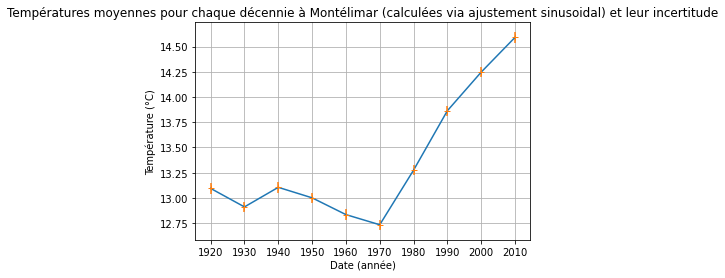

In [33]:
# On inverse les 2 listes pour pouvoir retrouver l'ordre chronologique
liste_b.reverse()
liste_db.reverse()

x=np.arange('1920', '2020', 10, dtype = 'datetime64[Y]')

plt.plot(x, liste_b)
plt.errorbar(x, liste_b, yerr=liste_db, marker = '+', linestyle = '')
plt.xlabel('Date (année)')
plt.ylabel('Température (°C)')
plt.title('Températures moyennes pour chaque décennie à Montélimar (calculées via ajustement sinusoidal) et leur incertitude')
plt.grid()
plt.show()

On constate là encore une hausse claire de la moyenne des températures (depuis les années 1970). On constate que les incertitudes de notre modèle sont extremement faibles (petites croix oranges).
Attention cependant : nous avons pris en compte seulement les incertitudes de notre modèle. Plus rigoureusement, il faudrait aussi prendre en compte les incertitudes sur les données expérimentales. En effet les températures enregistrées quotidienement à la station météorologique de Montélimar peuvent elles aussi avoir une marge d'erreur (à cause des instruments de mesure par exemple).

## III) Discussion et conclusion

Nous avons pu lors de ce mini projet montrer une tendance à la hausse des températures de surface à Montélimar. 

Nous pouvons aussi discuter nos résultats en mettant en perspective avec nos connaissances théoriques du sujet. Les études portant sur les températures de surface peuvent se faire sur des échelles de temps beaucoup plus longues. Typiquement, 30 ans est souvent une durée de référence pour ce type d’étude mais si l’on veut étudier le phénomène encore plus précisément il aurait fallu prendre en compte également des échelles de temps géologiques (par exemple on peut s’appuyer sur les cycles de Milankovitch). Toutefois, ce domaine temporel d'une trentaine d'années constitue un défi pour la recherche, à la frontière entre le climat et la météorologie, car les jeux d’observations directes sont trop restreints pour appréhender les variabilités et les phénomènes sous-jacents à l’œuvre.